In [108]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from imblearn.over_sampling import SMOTE
from IPython.display import display
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")


In [110]:
df = pd.read_csv('bank-additional/bank-additional-clean2.csv')

## Dataset Details 
The data is related with direct marketing campaigns of a Portuguese banking institution. 
The classification goal is to predict if the client will subscribe a term deposit (variable y).
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Dataset link - 
https://archive-beta.ics.uci.edu/ml/datasets/bank+marketing

### Data Attributes
#### age 
(numeric)

#### job : type of job 
(categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired',
'self-employed','services','student','technician','unemployed','unknown')

#### marital : marital status 
(categorical: 'divorced','married','single','unknown'; 
note: 'divorced' means divorced or widowed)

#### education 
(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate',
 'professional.course','university.degree','unknown')

#### default: has credit in default? 
(categorical: 'no','yes','unknown')

#### housing: has housing loan? 
(categorical: 'no','yes','unknown')

#### loan: has personal loan? 
(categorical: 'no','yes','unknown')

#### contact: contact communication type 
(categorical: 'cellular','telephone')

#### month: last contact month of year 
(categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

#### day_of_week: last contact day of the week 
(categorical: 'mon','tue','wed','thu','fri') 

#### duration: last contact duration, in seconds 
(numeric). 
Important note: this attribute highly affects the output target 
(e.g., if duration=0 then y='no'). 
Yet, the duration is not known before a call is performed. 
Also, after the end of the call y is obviously known. 
Thus, this input should only be included for benchmark purposes 
and should be discarded if the intention is to have a realistic predictive model.

#### campaign: number of contacts performed during this campaign 
and for this client 
(numeric)
, includes last contact) 

#### pdays: number of days that passed by after the client was last contacted 
from a previous campaign 
(numeric)
999 means client was not previously contacted) 

#### previous: number of contacts performed before this campaign 
and for this client 
(numeric)

#### poutcome: outcome of the previous marketing campaign 
(categorical: 'failure','nonexistent','success')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## There are few missing values in job, education, default, housing and loan columns

In [112]:
# Dropping the rows with missing values
df= df.dropna()

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3090 non-null   int64  
 1   job             3090 non-null   object 
 2   marital         3090 non-null   object 
 3   education       3090 non-null   object 
 4   default         3090 non-null   object 
 5   housing         3090 non-null   object 
 6   loan            3090 non-null   object 
 7   contact         3090 non-null   object 
 8   month           3090 non-null   object 
 9   day_of_week     3090 non-null   object 
 10  duration        3090 non-null   int64  
 11  campaign        3090 non-null   int64  
 12  pdays           3090 non-null   int64  
 13  previous        3090 non-null   int64  
 14  poutcome        3090 non-null   object 
 15  emp.var.rate    3090 non-null   float64
 16  cons.price.idx  3090 non-null   float64
 17  cons.conf.idx   3090 non-null   f

In [114]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no


In [115]:
# Converting categorical columns into numerical using LabelConcoder
y_dict = {'no': 0, 'yes': 1}
df['y'] = df['y'].map( y_dict )
df['job'] = df['job'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')

In [116]:
le = preprocessing.LabelEncoder()
df['job'] = le.fit_transform( df['job'] )
df['poutcome'] = le.fit_transform( df['poutcome'] )
df['marital'] = le.fit_transform( df['marital'] )
df['education'] = le.fit_transform( df['education'] )
df['default'] = le.fit_transform( df['default'] )
df['housing'] = le.fit_transform( df['housing'] )
df['loan'] = le.fit_transform( df['loan'] )

<AxesSubplot:>

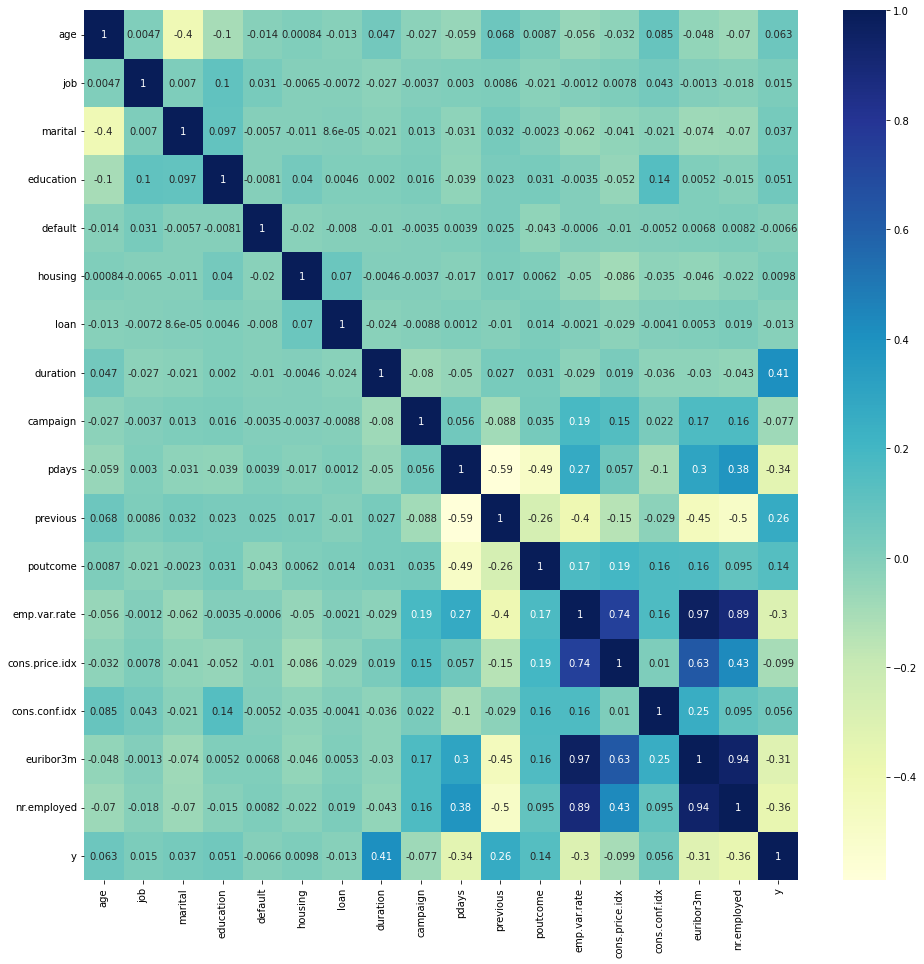

In [117]:
#Correlation between features
cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(16,16))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [118]:
#Splitting the Data
#After analyzing the data and removing highly correlated features
X = df[['age','job','marital','education']]
y = df['y']

In [119]:
#Baseline model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
y_test.value_counts()

0    816
1    111
Name: y, dtype: int64

In [120]:
#Baseline Accuracy - 0.8802588996763754

<AxesSubplot:xlabel='y', ylabel='count'>

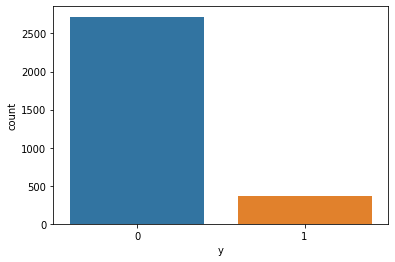

In [121]:
#Checking if dataset is unbalanced 
df['y'].value_counts()
sns.countplot( df['y'] )

In [122]:
from collections import Counter
print(Counter(y))

Counter({0: 2720, 1: 370})


In [123]:
# Using SMOTE to balance the data

oversample = SMOTE(k_neighbors=2)
X,y = oversample.fit_resample(X,y)
print(Counter(y))

Counter({0: 2720, 1: 2720})


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [125]:
# Comparing different models
def sfs(model,X_train,y_train):
    sfs_pipeline = Pipeline([('sfs',SequentialFeatureSelector(n_features_to_select="auto",estimator=Lasso())),
                         ('modl',model)])
    sfs_pipeline.fit(X_train,y_train)
    sfs_pipeline_train_pred = sfs_pipeline.predict(X_train)
    sfs_pipeline_test_pred = sfs_pipeline.predict(X_test)


    print("SequentialFeatureSelector Train Mean Absolute Error :",mean_absolute_error(y_train,sfs_pipeline_train_pred))
    print("SequentialFeatureSelector Test Mean Absolute Error :",mean_absolute_error(y_test,sfs_pipeline_test_pred))
    print("SequentialFeatureSelector  selected features:", sfs_pipeline[:-1].get_feature_names_out())


In [126]:
def pi(name,model,X_train,y_train,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    sfs(model,X_train,y_train)
    
    start=time.time()
    reg_model=model.fit(X_train,y_train)
    end=time.time()
    
    r = permutation_importance(reg_model,X_train,y_train,n_repeats=9,random_state=42)
    r.importances_mean
    pi = pd.DataFrame({"Features":X_train.columns,"importance":r.importances_mean}).sort_values(by="importance",ascending=False)
    print(pi)    
    
    pred=model.predict(X_test)
    score = model.score(X_test,y_test)
    model_params = model.get_params()
    accuracy = accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    
    
    # Confusion Matric / ROC Curve
    fig, ax = plt.subplots(1, 2, figsize = (20, 6))
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax = ax[0])
    RocCurveDisplay.from_predictions(y_test, pred, ax = ax[1])
    ax[1].plot(np.array([0, 1]), np.array([0, 1]))
    pd.set_option('display.max_colwidth',None)
    pd.DataFrame({'model': [name], 
              'best_params': [model_params],
             'best_score': [score],
              'best_time': [end-start],
             'accuracy_score': [accuracy]}).set_index('model')
    #display(pd)
    comparison.loc[len(comparison.index)] = [name,model_params,score,end-start,accuracy,auc]
    print(comparison)





In [127]:
comparison= pd.DataFrame({'model': [], 
             'best_params': [],
             'best_score': [],
             'best_time':[],
             'accuracy_score':[],
             'roc_auc_score':[]})
comparison=comparison.astype(str)
print(comparison.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           0 non-null      object
 1   best_params     0 non-null      object
 2   best_score      0 non-null      object
 3   best_time       0 non-null      object
 4   accuracy_score  0 non-null      object
 5   roc_auc_score   0 non-null      object
dtypes: object(6)
memory usage: 124.0+ bytes
None


In [128]:
def reg_model(name,X_train,y_train,X_test,y_test):
    reg=''
    if(name=='LR'):
        reg = LogisticRegression()
    if(name=='KNN'):
        reg = KNeighborsClassifier()
    if(name=='DT'):
        reg = DecisionTreeClassifier()
    if(name=='SVC'):
        reg = LinearSVC()
    pi(name,reg,X_train,y_train)

SequentialFeatureSelector Train Mean Absolute Error : 0.4800420168067227
SequentialFeatureSelector Test Mean Absolute Error : 0.4803921568627451
SequentialFeatureSelector  selected features: ['age' 'job']
    Features  importance
3  education    0.019491
0        age    0.018587
1        job    0.003852
2    marital   -0.001021
  model  \
0    LR   

                                                                                                                                                                                                                                                                            best_params  \
0  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}   

   best_score  best_time  accuracy_score  roc_auc_score  
0    0.536152   0.0108

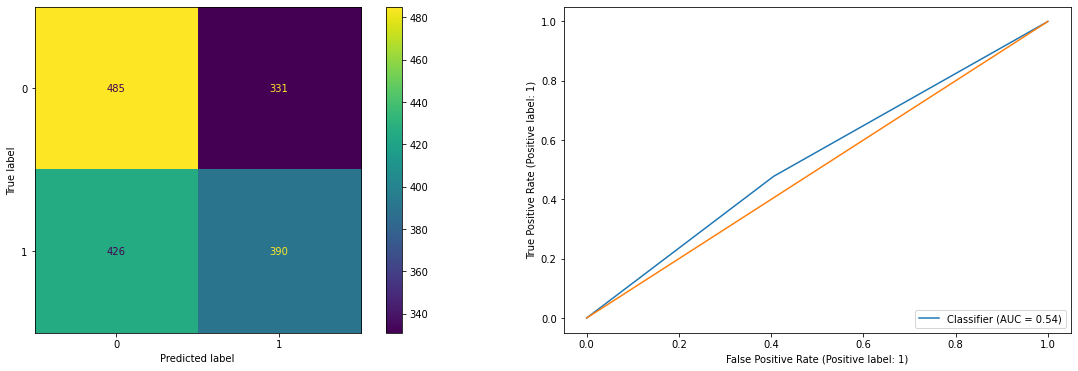

In [129]:
reg_model('LR',X_train,y_train,X_test,y_test)


SequentialFeatureSelector Train Mean Absolute Error : 0.31066176470588236
SequentialFeatureSelector Test Mean Absolute Error : 0.33639705882352944
SequentialFeatureSelector  selected features: ['age' 'job']
    Features  importance
0        age    0.298990
1        job    0.211222
3  education    0.195874
2    marital    0.077789
  model  \
0    LR   
1   KNN   

                                                                                                                                                                                                                                                                            best_params  \
0  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}   
1                                                                   

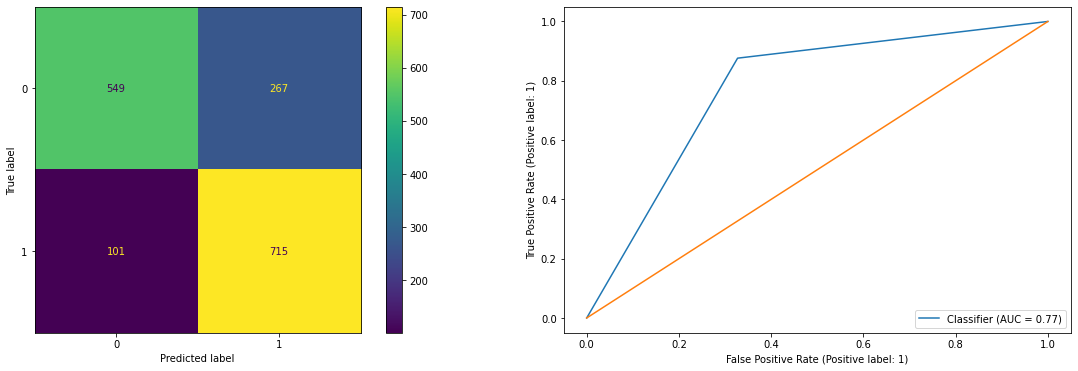

In [130]:
reg_model('KNN',X_train,y_train,X_test,y_test)


SequentialFeatureSelector Train Mean Absolute Error : 0.27442226890756305
SequentialFeatureSelector Test Mean Absolute Error : 0.3125
SequentialFeatureSelector  selected features: ['age' 'job']
    Features  importance
0        age    0.347689
1        job    0.288019
3  education    0.234594
2    marital    0.171043
  model  \
0    LR   
1   KNN   
2    DT   

                                                                                                                                                                                                                                                                              best_params  \
0    {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}   
1                                                                 

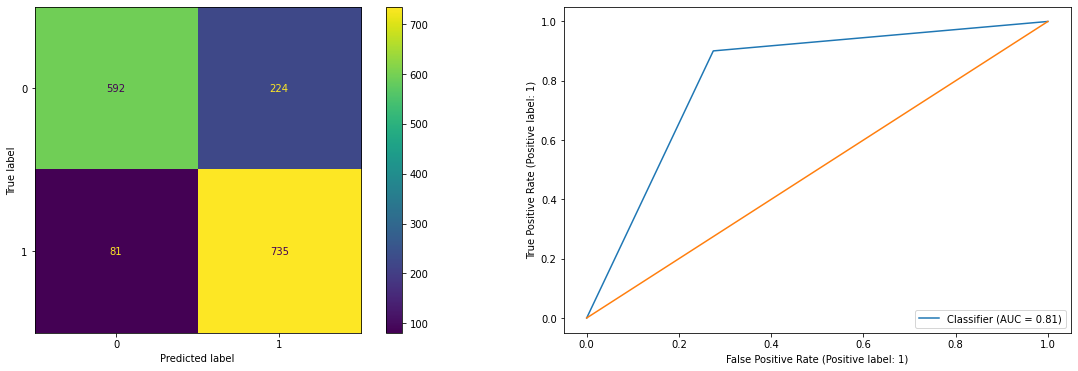

In [131]:
reg_model('DT',X_train,y_train,X_test,y_test)


SequentialFeatureSelector Train Mean Absolute Error : 0.5
SequentialFeatureSelector Test Mean Absolute Error : 0.5
SequentialFeatureSelector  selected features: ['age' 'job']
    Features  importance
0        age         0.0
1        job         0.0
2    marital         0.0
3  education         0.0
  model  \
0    LR   
1   KNN   
2    DT   
3   SVC   

                                                                                                                                                                                                                                                                              best_params  \
0    {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}   
1                                                                         

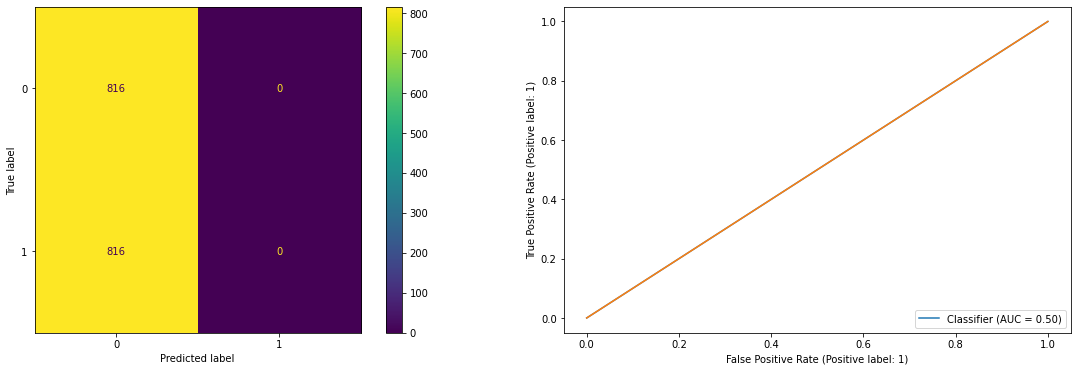

In [132]:
reg_model('SVC',X_train,y_train,X_test,y_test)


<AxesSubplot:xlabel='model', ylabel='best_score'>

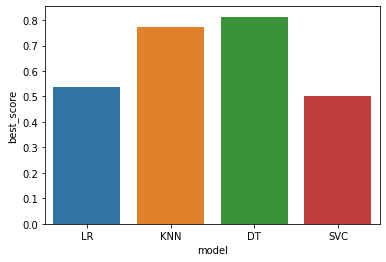

In [133]:
sns.barplot(data=comparison,x=comparison['model'],y=comparison['best_score'])


<AxesSubplot:xlabel='model', ylabel='best_time'>

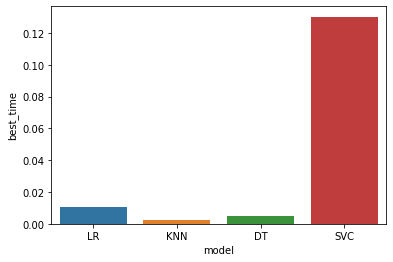

In [134]:
sns.barplot(data=comparison,x=comparison['model'],y=comparison['best_time'])


# Model Evaluation Cross Validation

In [135]:
dfCompare= pd.DataFrame({'Model': [], 
             'Train_Time': [],
             'Test_Time': [],
             'Best Params': [],            
             'Train_Accuracy': [],
             'Test_Accuracy':[]})
dfCompare=dfCompare.astype(str)
print(dfCompare.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           0 non-null      object
 1   Train_Time      0 non-null      object
 2   Test_Time       0 non-null      object
 3   Best Params     0 non-null      object
 4   Train_Accuracy  0 non-null      object
 5   Test_Accuracy   0 non-null      object
dtypes: object(6)
memory usage: 124.0+ bytes
None


In [136]:
def pi_grid(name,model,X_train,y_train,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    sfs(model,X_train,y_train)
    
    train_start=time.time()
    reg_model=model.fit(X_train,y_train)
    train_end=time.time()
    
    r = permutation_importance(reg_model,X_train,y_train,n_repeats=9,random_state=42)
    r.importances_mean
    pi = pd.DataFrame({"Features":X_train.columns,"importance":r.importances_mean}).sort_values(by="importance",ascending=False)
    print(pi)
    train_score = model.score(X_test,y_test)
    
    grid = GridSearchCV(estimator=model, param_grid=parameters)
    test_start=time.time()
    grid.fit(X_train,y_train)
    test_end=time.time()
    grid_pred=grid.predict(X_test)
    test_score=grid.score(X_test,y_test)
    best_params = grid.best_params_
    fig, ax = plt.subplots(1, 2, figsize = (20, 6))
    ConfusionMatrixDisplay.from_predictions(y_test, grid_pred, ax = ax[0])
    RocCurveDisplay.from_predictions(y_test, grid_pred, ax = ax[1])
    ax[1].plot(np.array([0, 1]), np.array([0, 1]))
    
    dfCompare.loc[len(dfCompare.index)] = [name,train_end-train_start,test_end-test_start,best_params,train_score,test_score]
    print(dfCompare)
  

In [137]:
def reg_grid_model(name,X_train,y_train,X_test,y_test):
    reg=''
    if(name=='LR'):
        reg = LogisticRegression()
    if(name=='KNN'):
        reg = KNeighborsClassifier()
    if(name=='DT'):
        reg = DecisionTreeClassifier()
    if(name=='SVC'):
        reg = LinearSVC()
    pi_grid(name,reg,X_train,y_train)

SequentialFeatureSelector Train Mean Absolute Error : 0.4800420168067227
SequentialFeatureSelector Test Mean Absolute Error : 0.4803921568627451
SequentialFeatureSelector  selected features: ['age' 'job']
    Features  importance
3  education    0.019491
0        age    0.018587
1        job    0.003852
2    marital   -0.001021
  Model  Train_Time  Test_Time  \
0    LR     0.00958   3.163722   

                                               Best Params  Train_Accuracy  \
0  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10}        0.536152   

   Test_Accuracy  
0       0.531863  


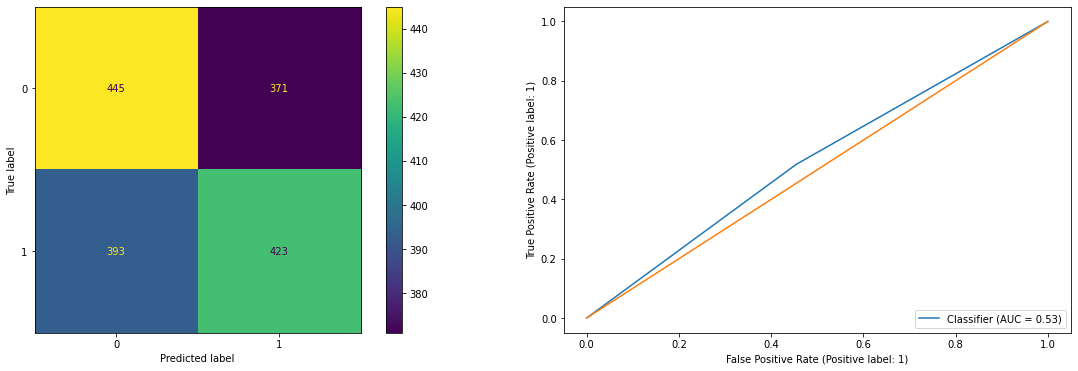

In [138]:
parameters = {
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [10, 30, 80, 100, 120],
                'class_weight': [None, 'balanced']
            }
reg_grid_model('LR',X_train,y_train,X_test,y_test)


SequentialFeatureSelector Train Mean Absolute Error : 0.31066176470588236
SequentialFeatureSelector Test Mean Absolute Error : 0.33639705882352944
SequentialFeatureSelector  selected features: ['age' 'job']
    Features  importance
0        age    0.298990
1        job    0.211222
3  education    0.195874
2    marital    0.077789
  Model  Train_Time  Test_Time  \
0    LR    0.009580   3.163722   
1   KNN    0.002425   6.813686   

                                               Best Params  Train_Accuracy  \
0  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10}        0.536152   
1                                       {'n_neighbors': 3}        0.774510   

   Test_Accuracy  
0       0.531863  
1       0.786152  


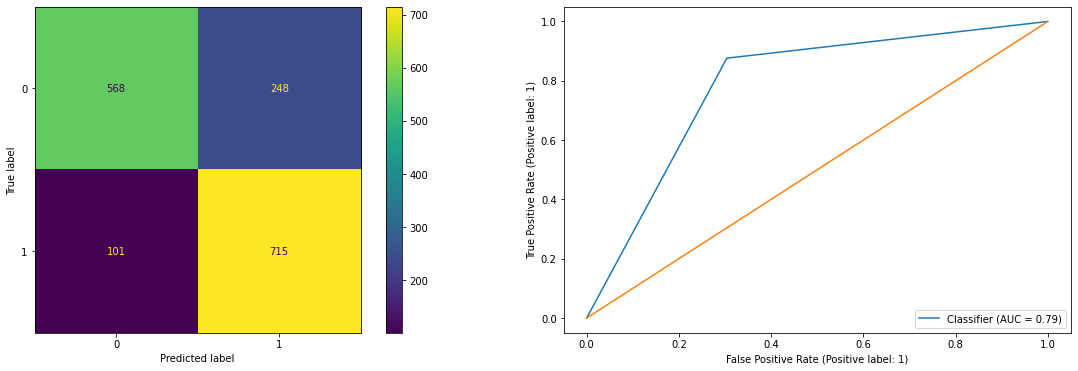

In [139]:
parameters =  {'n_neighbors':list(range(1, 100,2))}
reg_grid_model('KNN',X_train,y_train,X_test,y_test)


SequentialFeatureSelector Train Mean Absolute Error : 0.27442226890756305
SequentialFeatureSelector Test Mean Absolute Error : 0.3125
SequentialFeatureSelector  selected features: ['age' 'job']
    Features  importance
0        age    0.347835
1        job    0.286648
3  education    0.235061
2    marital    0.172794
  Model  Train_Time  Test_Time  \
0    LR    0.009580   3.163722   
1   KNN    0.002425   6.813686   
2    DT    0.004756   4.327572   

                                                                                       Best Params  \
0                                          {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10}   
1                                                                               {'n_neighbors': 3}   
2  {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.05}   

   Train_Accuracy  Test_Accuracy  
0        0.536152       0.531863  
1        0.774510       0.786152  
2        0.815564       0.5263

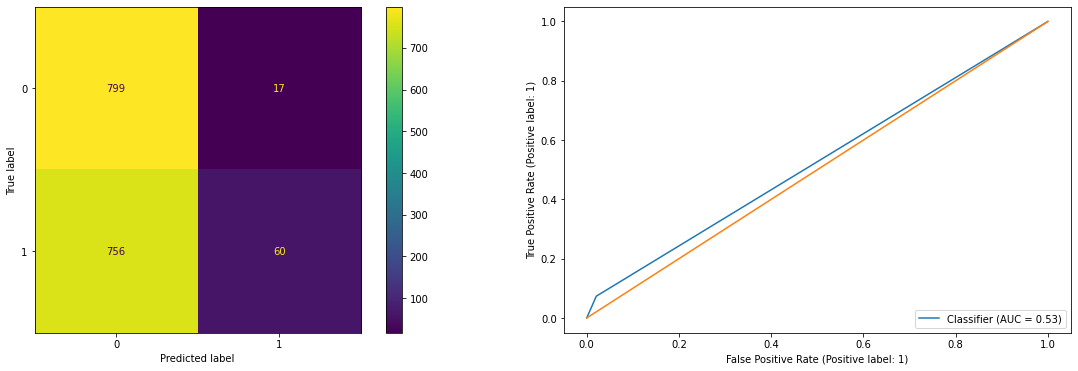

In [140]:
parameters = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
          'max_depth': [2,3,4,5,6,7,8,9,10],
          'criterion': ['gini','entropy'],
          'min_samples_split': [.05,0.1, 0.2,0.3]}
reg_grid_model('DT',X_train,y_train,X_test,y_test)


SequentialFeatureSelector Train Mean Absolute Error : 0.5
SequentialFeatureSelector Test Mean Absolute Error : 0.5
SequentialFeatureSelector  selected features: ['age' 'job']
    Features  importance
0        age         0.0
1        job         0.0
2    marital         0.0
3  education         0.0
  Model  Train_Time  Test_Time  \
0    LR    0.009580   3.163722   
1   KNN    0.002425   6.813686   
2    DT    0.004756   4.327572   
3   SVC    0.132934   3.223375   

                                                                                       Best Params  \
0                                          {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10}   
1                                                                               {'n_neighbors': 3}   
2  {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.05}   
3                                         {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100}   

   Train_Accuracy 

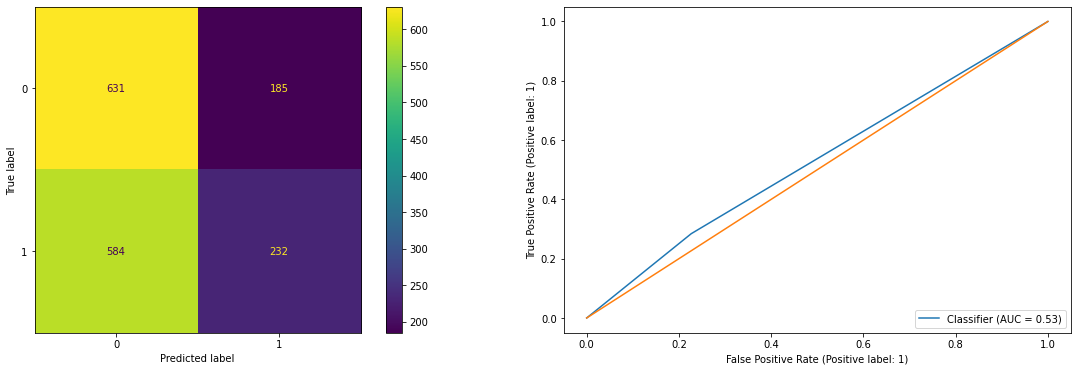

In [141]:
parameters = {
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [10, 30, 80, 100, 120],
                'class_weight': [None, 'balanced']
            }
reg_grid_model('SVC',X_train,y_train,X_test,y_test)


<AxesSubplot:xlabel='Model', ylabel='Train_Accuracy'>

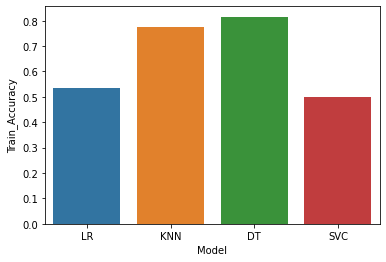

In [142]:
sns.barplot(data=dfCompare,x=dfCompare['Model'],y=dfCompare['Train_Accuracy'])


<AxesSubplot:xlabel='Model', ylabel='Test_Accuracy'>

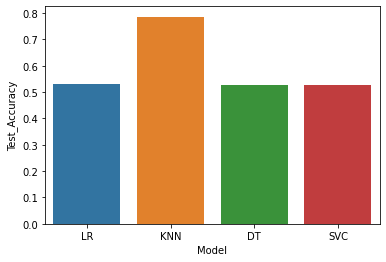

In [143]:
sns.barplot(data=dfCompare,x=dfCompare['Model'],y=dfCompare['Test_Accuracy'])


<AxesSubplot:xlabel='model', ylabel='Train_Time'>

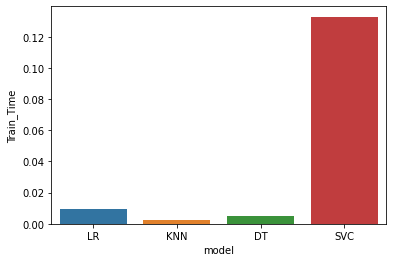

In [144]:
sns.barplot(data=comparison,x=comparison['model'],y=dfCompare['Train_Time'])


In [145]:
# Adding additional features and doing crossvalidation
X = df[['age','job','marital','education','default','housing','loan','campaign','pdays','previous','poutcome']]
y = df['y']
oversample = SMOTE(k_neighbors=2)
X,y = oversample.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

SequentialFeatureSelector Train Mean Absolute Error : 0.3870798319327731
SequentialFeatureSelector Test Mean Absolute Error : 0.3805147058823529
SequentialFeatureSelector  selected features: ['age' 'job' 'marital' 'education' 'pdays']
     Features  importance
8       pdays    0.031221
7    campaign    0.023343
5     housing    0.021417
6        loan    0.019491
0         age    0.007120
1         job    0.000729
3   education    0.000058
4     default    0.000000
10   poutcome   -0.000992
9    previous   -0.003356
2     marital   -0.004260
  Model  Train_Time  Test_Time  \
0    LR    0.009580   3.163722   
1   KNN    0.002425   6.813686   
2    DT    0.004756   4.327572   
3   SVC    0.132934   3.223375   
4    LR    0.045026   8.817862   

                                                                                       Best Params  \
0                                          {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10}   
1                                           

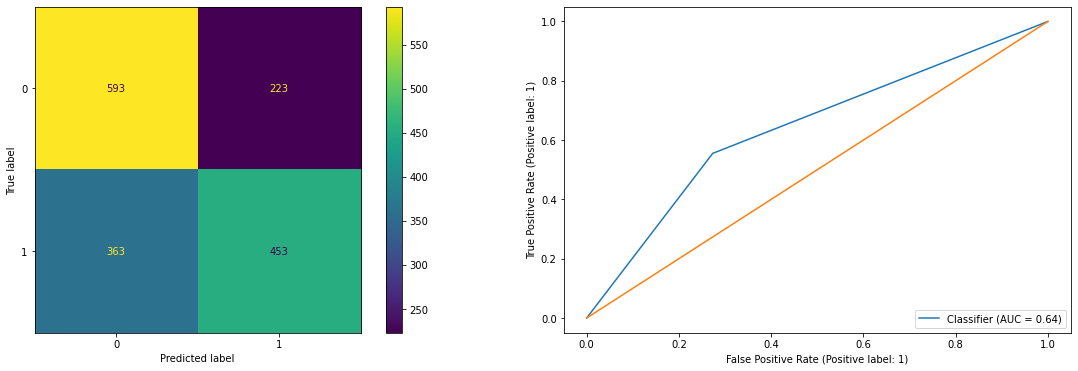

In [146]:
#LR
parameters = {
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [10, 30, 80, 100, 120],
                'class_weight': [None, 'balanced']
            }
reg_grid_model('LR',X_train,y_train,X_test,y_test)

SequentialFeatureSelector Train Mean Absolute Error : 0.16071428571428573
SequentialFeatureSelector Test Mean Absolute Error : 0.19669117647058823
SequentialFeatureSelector  selected features: ['age' 'job' 'marital' 'education' 'pdays']
     Features  importance
0         age    0.268266
1         job    0.176383
3   education    0.146271
8       pdays    0.104575
7    campaign    0.095705
2     marital    0.026844
5     housing    0.015202
10   poutcome    0.008112
9    previous    0.005631
6        loan    0.001984
4     default    0.000000
  Model  Train_Time  Test_Time  \
0    LR    0.009580   3.163722   
1   KNN    0.002425   6.813686   
2    DT    0.004756   4.327572   
3   SVC    0.132934   3.223375   
4    LR    0.045026   8.817862   
5   KNN    0.003367   9.996212   

                                                                                       Best Params  \
0                                          {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10}   
1       

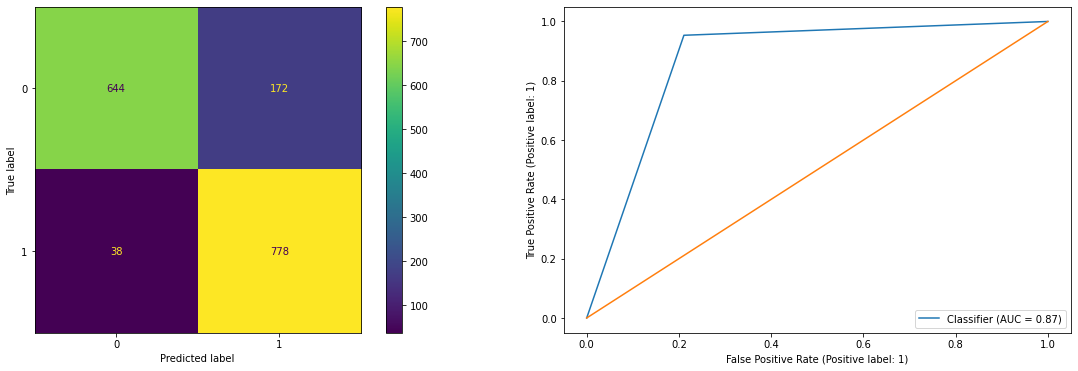

In [147]:
#KNN
parameters =  {'n_neighbors':list(range(1, 100,2))}
reg_grid_model('KNN',X_train,y_train,X_test,y_test)


SequentialFeatureSelector Train Mean Absolute Error : 0.10005252100840337
SequentialFeatureSelector Test Mean Absolute Error : 0.19240196078431374
SequentialFeatureSelector  selected features: ['age' 'job' 'marital' 'education' 'pdays']
     Features  importance
0         age    0.302375
1         job    0.216708
3   education    0.179826
7    campaign    0.167250
5     housing    0.145016
8       pdays    0.122374
2     marital    0.100986
10   poutcome    0.093721
9    previous    0.082633
6        loan    0.054097
4     default    0.000000
  Model  Train_Time  Test_Time  \
0    LR    0.009580   3.163722   
1   KNN    0.002425   6.813686   
2    DT    0.004756   4.327572   
3   SVC    0.132934   3.223375   
4    LR    0.045026   8.817862   
5   KNN    0.003367   9.996212   
6    DT    0.007685   5.481650   

                                                                                          Best Params  \
0                                             {'C': 0.01, 'class_weight':

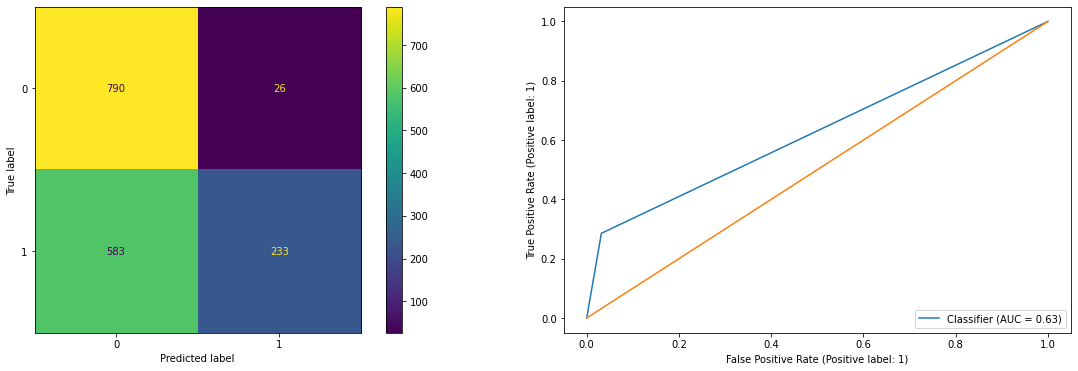

In [148]:
#Decision Tree
parameters = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
          'max_depth': [2,3,4,5,6,7,8,9,10],
          'criterion': ['gini','entropy'],
          'min_samples_split': [.05,0.1, 0.2,0.3]}
reg_grid_model('DT',X_train,y_train,X_test,y_test)


SequentialFeatureSelector Train Mean Absolute Error : 0.5
SequentialFeatureSelector Test Mean Absolute Error : 0.5
SequentialFeatureSelector  selected features: ['age' 'job' 'marital' 'education' 'pdays']
     Features  importance
8       pdays    0.103962
7    campaign    0.000292
0         age    0.000000
1         job    0.000000
2     marital    0.000000
3   education    0.000000
4     default    0.000000
5     housing    0.000000
6        loan    0.000000
9    previous    0.000000
10   poutcome    0.000000
  Model  Train_Time  Test_Time  \
0    LR    0.009580   3.163722   
1   KNN    0.002425   6.813686   
2    DT    0.004756   4.327572   
3   SVC    0.132934   3.223375   
4    LR    0.045026   8.817862   
5   KNN    0.003367   9.996212   
6    DT    0.007685   5.481650   
7   SVC    0.179582   4.681846   

                                                                                          Best Params  \
0                                             {'C': 0.01, 'class_weight

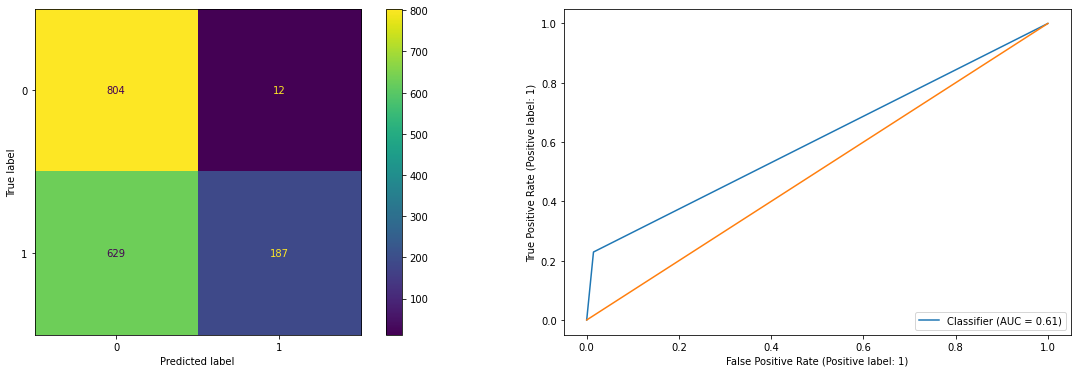

In [149]:
#SVC

parameters = {
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [10, 30, 80, 100, 120],
                'class_weight': [None, 'balanced']
            }
reg_grid_model('SVC',X_train,y_train,X_test,y_test)


## Conclusions

### We see that with additional features Model Accuracy has increased across all four models
### KNN has the best accuracy out of all the four models on this dataset.
### KNN also has the best Train time
### Out of the list of features 'age' 'job' 'marital' 'education' 'pdays' are the key features for identifying customers who will potentially go for term deposit